{0: ([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [1.1450991821289063, 1.1479949188232421, 1.1442632293701172, 1.140053939819336, 1.1362538146972656, 1.1329864501953124, 1.1334176635742188, 1.1342282867431641, 1.1370245361328124, 1.1409028625488282, 1.1451239776611328, 1.1465653991699218, 1.1465625, 1.143921890258789, 1.139459228515625, 1.1357367706298829, 1.1322022247314454, 1.1291285705566407, 1.1281108093261718, 1.1267537689208984, 1.125924301147461, 1.1253740692138672, 1.1253059387207032, 1.1252111053466798, 1.1257078552246094, 1.1261861419677734, 1.1285784149169922, 1.131239013671875])}


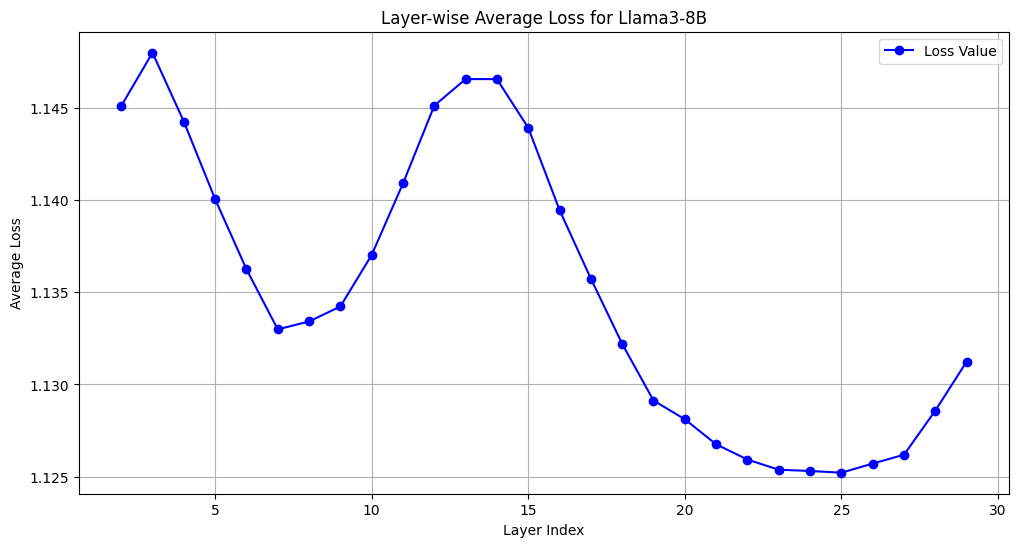

28


In [1]:
import os
import matplotlib.pyplot as plt

epoch_layerwise_results = {}

for epoch in range(0, 1):
    loss_list = []
    index_list = []

    file_path = "./llama2/safety_evaluation/llama7b_dolly_loss_center"
    if not os.path.exists(file_path):
        print(f"Warning: {file_path} does not exist.")
        continue

    for file in os.listdir(file_path):
        if file.endswith(".jsonl") and file.startswith(f"prune_"):
            index_str = file.split(".")[0].split("_")[1]
            index = int(index_str)

            with open(os.path.join(file_path, file), 'r') as f:
                lines = f.readlines()
                if lines:
                    last_line = lines[-1].strip()
                    if last_line.startswith("Average loss:"):
                        avg_loss = float(last_line.split("Average loss:")[-1].strip())
                        loss_list.append(avg_loss)
                        index_list.append(index)

    if loss_list:
        combined_list = list(zip(index_list, loss_list))
        combined_list.sort()
        index_list, loss_list = zip(*combined_list)
        epoch_layerwise_results[epoch] = (list(index_list), list(loss_list))

print(epoch_layerwise_results)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

plt.figure(figsize=(12, 6))
for idx, (epoch, (index_list, loss_list)) in enumerate(epoch_layerwise_results.items()):
    plt.plot(index_list, loss_list, marker='o', linestyle='-', label=f'Loss Value', color=colors[idx])

plt.xlabel('Layer Index')
plt.ylabel('Average Loss')
plt.title('Layer-wise Average Loss for Llama3-8B')
plt.legend()
plt.grid()
plt.show()
print(len(loss_list))


In [2]:
# print(loss_list)
import numpy as np
import torch
res=torch.load("./llama2/model_cka/Llama-2-7b-chat-hf/dolly_linear_cka.pt")
print(res.shape)

def calculate_all_diagonal_window_means(matrix: torch.Tensor, window_size: int) -> torch.Tensor:
    """
    Calculate the mean of diagonal values in a window for every column in a given 2D matrix.
    
    Args:
    matrix (torch.Tensor): 2D PyTorch tensor of shape (32, 32)
    window_size (int): The size of the diagonal window.
    
    Returns:
    torch.Tensor: A 1D tensor of shape (32,) containing the mean of the diagonal elements for each column.
    """
    # Ensure the matrix is 2D and of shape (32, 32)
    assert matrix.dim() == 2, "Input matrix must be 2D"
    assert window_size > 0, "Window size must be a positive integer"
    
    # Create an array to store the diagonal means for each column
    diagonal_means = torch.zeros(matrix.shape[1], dtype=torch.float32)
    
    # Loop over each column to calculate the mean of diagonal elements
    for col_index in range(matrix.shape[1]):
        half_window = window_size // 2
        start_row = max(0, col_index - half_window)
        end_row = min(matrix.shape[0], col_index + half_window + 1)
        
        # Extract diagonal elements
        diagonal_values = [matrix[row, col_index] for row in range(start_row, end_row) if 0 <= row < matrix.shape[0]]
        
        if len(diagonal_values) > 0:
            diagonal_mean = torch.mean(torch.tensor(diagonal_values, dtype=torch.float32))
        else:
            diagonal_mean = 0.0  # If no elements are found, default to 0
        
        diagonal_means[col_index] = diagonal_mean
    
    return diagonal_means


torch.Size([32, 32])


/var/folders/t2/hz8qyfnj31z360g6tk2vthw00000gn/T/ipykernel_17748/2403824221.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  res=torch.load("./llama2/model_cka/Llama-2-7b

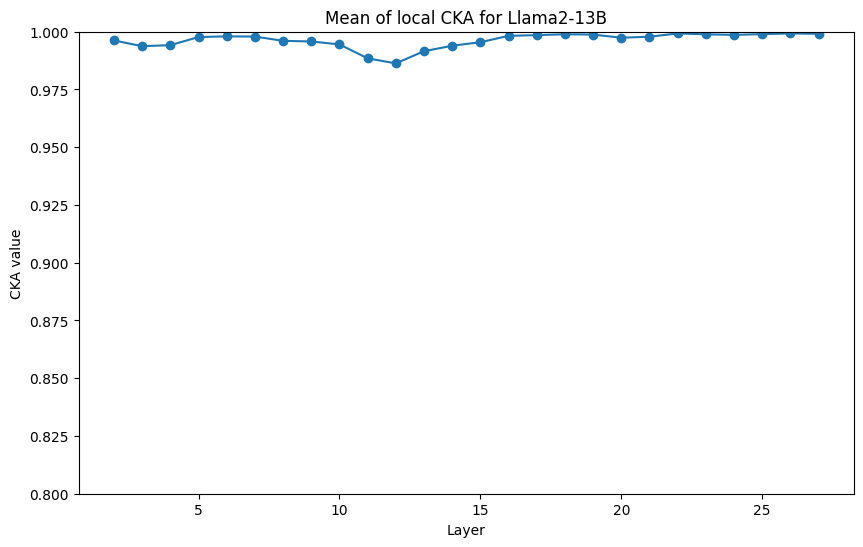

[0.9962074  0.993743   0.99418736 0.9976848  0.9979934  0.99790424
 0.9960583  0.9957728  0.9945124  0.9884781  0.9862973  0.9915669
 0.9939348  0.99545735 0.99820894 0.998535   0.9989095  0.99876744
 0.9974065  0.99783546 0.9992552  0.9988749  0.99863935 0.9989627
 0.9992514  0.9991095 ]
26
Spearman's rank correlation: -0.8523076923076922
P-value: 3.276977730695682e-08


In [3]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
result1=calculate_all_diagonal_window_means(res, 3).numpy()[3:-3]

# np.random.shuffle(result1)
plt.figure(figsize=(10, 6))
x_index = range(2,len(result1)+2)  # Create an x-index starting from 2
# Create an x-index starting from 2

plt.plot(x_index, result1, marker='o', linestyle='-')
plt.title('Mean of local CKA for Llama2-13B')   
plt.ylabel('CKA value')
plt.ylim(0.8, 1)
plt.xlabel('Layer')
plt.show()

print(result1)

loss_list=loss_list[1:-1]

print(len(loss_list))



correlation, p_value = spearmanr(result1, loss_list)

print(f"Spearman's rank correlation: {correlation}")
print(f"P-value: {p_value}")